In [1]:
import cptac
import cptac.utils as u
import seaborn as sns
import matplotlib.pyplot as plt

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
en = cptac.Endometrial()
col = cptac.Colon()
br = cptac.Brca()

In [3]:
gene = 'PIK3CA'

In [4]:
#Prioritize hotspot mutations
endo = en.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 48 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [5]:
#pull out all the missense mutation and wildtype tumors 
missense = endo.loc[(endo['Mutation'] == "Missense_Mutation") | (endo['Mutation'] == "Wildtype_Tumor")]

# Now look at the cis effect for endometrial cancer 
(that is the difference in missense mutation between wildtype_tumor and missense_mutation)

In [6]:
#drop everything but the mutation column and join to proteomic data
missense = missense.drop(columns=['Location', 'Mutation_Status'])
prot = en.get_proteomics() #get proteomic data
missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
C3L-00006,Missense_Mutation,-0.4500
C3L-00008,Wildtype_Tumor,-0.2150
C3L-00032,Missense_Mutation,-0.1780
C3L-00090,Wildtype_Tumor,-0.3920
C3L-00136,Wildtype_Tumor,-0.3490
...,...,...
C3N-01510,Missense_Mutation,-0.3730
C3N-01520,Missense_Mutation,-0.4860
C3N-01537,Wildtype_Tumor,-0.0312


In [7]:
u.wrap_ttest(missense, "Mutation", [gene+"_proteomics"], return_all=True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.201595


In [8]:
def format_pval_annotation(pval_symbol, x1, x2, line_start = .05, line_height=.05):
    # for manual adjustment to pval annotations
    
    y, h = line_start, line_height
    plt.plot([x1, x1, x2, x2], #draw horizontal line
             [y, y+h, y+h, y], #vertical line
             lw=1.5, color= '.3')
    plt.text((x1+x2)*.5, # half between x coord
             y+h, pval_symbol, horizontalalignment='center', verticalalignment='bottom', color = "black")



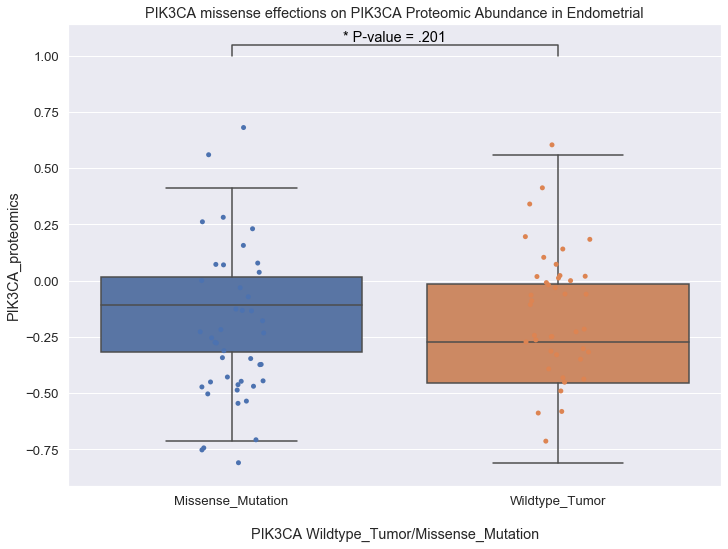

In [104]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Endometrial")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .201', 0, 1, 1)


plt.show()
plt.clf()
plt.close()

## This is doing it without the mutations we get from get_all_mutvars()


In [90]:
joined = en.join_omics_to_mutations('proteomics', mutations_genes="PIK3CA", omics_genes="PIK3CA")
# joined = en.reduce_multiindex(df=joined, levels_to_drop="Database_ID")
joined = joined.drop(columns=['PIK3CA_Location', 'PIK3CA_Mutation_Status','Sample_Status'])
joined['PIK3CA_Mutation'] = [','.join(map(str, l)) for l in joined['PIK3CA_Mutation']]
joined = joined.loc[(joined['PIK3CA_Mutation'] =='Missense_Mutation')|(joined['PIK3CA_Mutation'] =='Wildtype_Tumor')]
joined['PIK3CA_Mutation'].unique()
joined

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 97 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


Name,PIK3CA_proteomics,PIK3CA_Mutation
Patient_ID,,
C3L-00006,-0.4500,Missense_Mutation
C3L-00008,-0.2150,Wildtype_Tumor
C3L-00032,-0.1780,Missense_Mutation
C3L-00090,-0.3920,Wildtype_Tumor
C3L-00098,0.2870,Wildtype_Tumor
...,...,...
C3N-01520,-0.4860,Missense_Mutation
C3N-01521,0.0820,Wildtype_Tumor
C3N-01537,-0.0312,Wildtype_Tumor


In [91]:
u.wrap_ttest(joined, 'PIK3CA_Mutation', ['PIK3CA_proteomics'], return_all = True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.219162


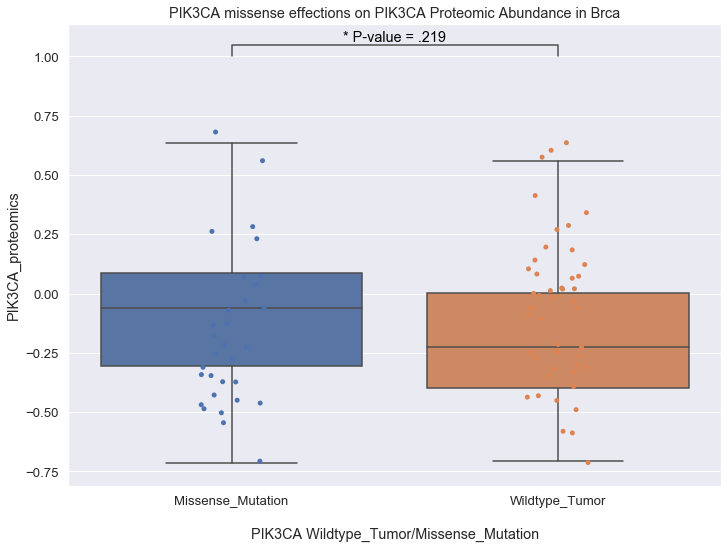

In [92]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='PIK3CA_Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=joined,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Brca")
boxplot = sns.stripplot(x='PIK3CA_Mutation', y=gene+'_proteomics', data=joined, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .219', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# Cis effects for BRCA

In [10]:
#Prioritize hotspot mutations
brca = br.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [11]:
#pull out all the missense mutation and wildtype tumors 
brca_missense = brca.loc[(brca['Mutation'] == "Missense_Mutation") | (brca['Mutation'] == "Wildtype_Tumor")]

In [12]:
#drop everything but the mutation column and join to proteomic data
brca_missense = brca_missense.drop(columns=['Location', 'Mutation_Status'])
prot = br.get_proteomics() #get proteomic data
brca_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
brca_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
CPT001846,Missense_Mutation,0.6245
X01BR001,Wildtype_Tumor,-0.6810
X01BR008,Wildtype_Tumor,-0.9478
X01BR020,Wildtype_Tumor,-0.8300
X01BR023,Wildtype_Tumor,0.5457
...,...,...
X20BR008,Missense_Mutation,0.4727
X21BR002,Missense_Mutation,0.3150
X21BR010,Missense_Mutation,0.1131


In [13]:
# brca_missense = brca_missense.drop(columns=['Location', 'Mutation_Status'])
# prot = br.get_proteomics()
brca_missense.index.difference(prot[gene].index)

Index([], dtype='object', name='Patient_ID')

In [14]:
u.wrap_ttest(brca_missense, "Mutation", [gene+"_proteomics"], return_all=True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.689518


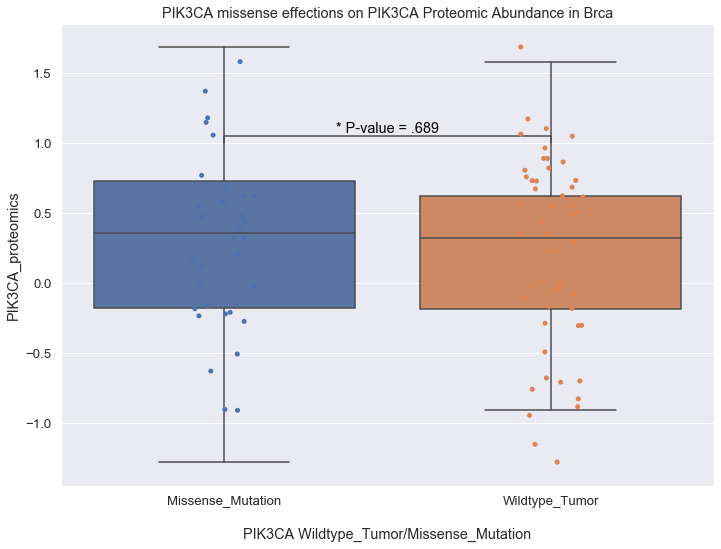

In [70]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=brca_missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Brca")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=brca_missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .689', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

In [65]:
# help(br.join_omics_to_mutations)

## This is doing it without the mutations we get from get_all_mutvars()

In [58]:
joined = br.join_omics_to_mutations('proteomics', mutations_genes="PIK3CA", omics_genes="PIK3CA")
joined = br.reduce_multiindex(df=joined, levels_to_drop="Database_ID")
joined = joined.drop(columns=['PIK3CA_Location', 'PIK3CA_Mutation_Status','Sample_Status'])
joined['PIK3CA_Mutation'] = [','.join(map(str, l)) for l in joined['PIK3CA_Mutation']]
joined = joined.loc[(joined['PIK3CA_Mutation'] =='Missense_Mutation')|(joined['PIK3CA_Mutation'] =='Wildtype_Tumor')]
joined['PIK3CA_Mutation'].unique()
joined

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 83 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


Name,PIK3CA_proteomics,PIK3CA_Mutation
Patient_ID,,
CPT000814,0.2542,Wildtype_Tumor
CPT001846,0.6245,Missense_Mutation
X01BR001,-0.6810,Wildtype_Tumor
X01BR008,-0.9478,Wildtype_Tumor
X01BR009,-0.4317,Wildtype_Tumor
...,...,...
X21BR001,1.0291,Wildtype_Tumor
X21BR002,0.3150,Missense_Mutation
X21BR010,0.1131,Missense_Mutation


In [60]:
u.wrap_ttest(joined, 'PIK3CA_Mutation', ['PIK3CA_proteomics'], return_all = True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.954729


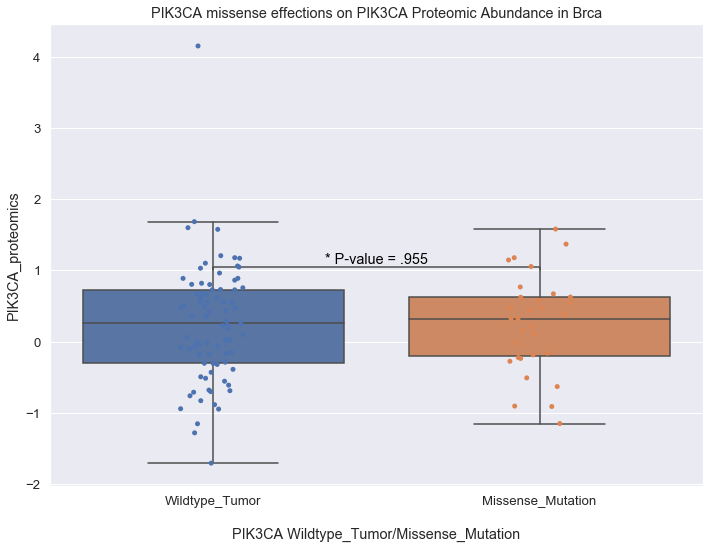

In [69]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='PIK3CA_Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=joined,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Brca")
boxplot = sns.stripplot(x='PIK3CA_Mutation', y=gene+'_proteomics', data=joined, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .955', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# Cis effect for Colon

In [18]:
#Prioritize hotspot mutations
colon = col.get_genotype_all_vars("PIK3CA", mutation_hotspot=["H1047R", 'E542K', 'E535K'])

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 82 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)
cptac warning: CNV data was not found for the following samples, so CNV data columns were filled with NaN for these samples: 05CO045 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/cptac/dataset.py, line 382)


In [19]:
colon['Mutation'].unique()

array(['Wildtype_Tumor', 'Amplification', 'nonframeshift substitution',
       'nonsynonymous SNV', 'Deletion', 'nonsynonymous SNV_hotspot',
       'frameshift substitution'], dtype=object)

In [20]:
#pull out all the missense mutation and wildtype tumors 
colon_missense = colon.loc[(colon['Mutation'] == "nonsynonymous SNV") | (colon['Mutation'] == "Wildtype_Tumor")]

In [21]:
#drop everything but the mutation column and join to proteomic data
colon_missense = colon_missense.drop(columns=['Location', 'Mutation_Status'])
prot = col.get_proteomics() #get proteomic data
colon_missense[gene+'_proteomics'] = prot[gene]#filter for PIK3CA
colon_missense

Name,Mutation,PIK3CA_proteomics
Patient_ID,,
01CO001,Wildtype_Tumor,NaN
01CO005,Wildtype_Tumor,NaN
01CO006,Wildtype_Tumor,-0.515
01CO013,Wildtype_Tumor,0.106
01CO015,Wildtype_Tumor,-0.687
...,...,...
20CO007,nonsynonymous SNV,-0.245
22CO004,Wildtype_Tumor,-0.817
22CO006,Wildtype_Tumor,0.177


In [22]:
u.wrap_ttest(colon_missense, "Mutation", [gene+"_proteomics"], return_all=True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.31414


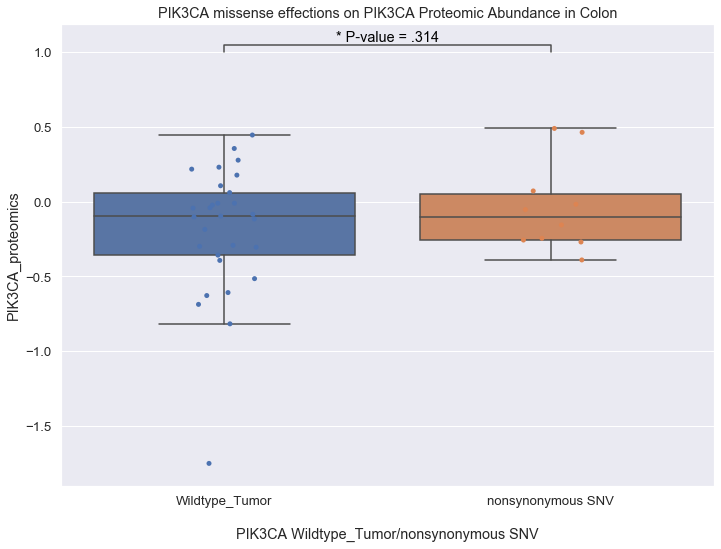

In [83]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'nonsynonymous SNV'],
                     data=colon_missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Colon")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=colon_missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/nonsynonymous SNV", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .314', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

## This is doing it without the mutations we get from get_all_mutvars()

In [81]:
joined = col.join_omics_to_mutations('proteomics', mutations_genes="PIK3CA", omics_genes="PIK3CA")
# joined = col.reduce_multiindex(df=joined, levels_to_drop="Database_ID")
joined = joined.drop(columns=['PIK3CA_Location', 'PIK3CA_Mutation_Status','Sample_Status'])
joined['PIK3CA_Mutation'] = [','.join(map(str, l)) for l in joined['PIK3CA_Mutation']]
joined = joined.loc[(joined['PIK3CA_Mutation'] =='nonsynonymous SNV')|(joined['PIK3CA_Mutation'] =='Wildtype_Tumor')]
joined = joined.dropna()
joined['PIK3CA_Mutation'].unique()
joined

cptac warning: In joining the somatic_mutation table, no mutations were found for the following samples, so they were filled with Wildtype_Tumor or Wildtype_Normal: 183 samples for the PIK3CA gene (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01CO001, 05CO005, 05CO007, 05CO014, 05CO055, 11CO059, 11CO060, 14CO002, 16CO012, 24CO005 (/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 1)


Name,PIK3CA_proteomics,PIK3CA_Mutation
Patient_ID,,
01CO006,-0.5150,Wildtype_Tumor
01CO008,-0.0209,Wildtype_Tumor
01CO013,0.1060,Wildtype_Tumor
01CO015,-0.6870,Wildtype_Tumor
01CO019,0.3550,Wildtype_Tumor
01CO022,-0.2700,nonsynonymous SNV
05CO002,-0.1020,Wildtype_Tumor
05CO006,-0.2570,nonsynonymous SNV
05CO011,1.4900,Wildtype_Tumor


In [82]:
u.wrap_ttest(joined, 'PIK3CA_Mutation', ['PIK3CA_proteomics'], return_all = True)

,Comparison,P_Value
0,PIK3CA_proteomics,0.975103


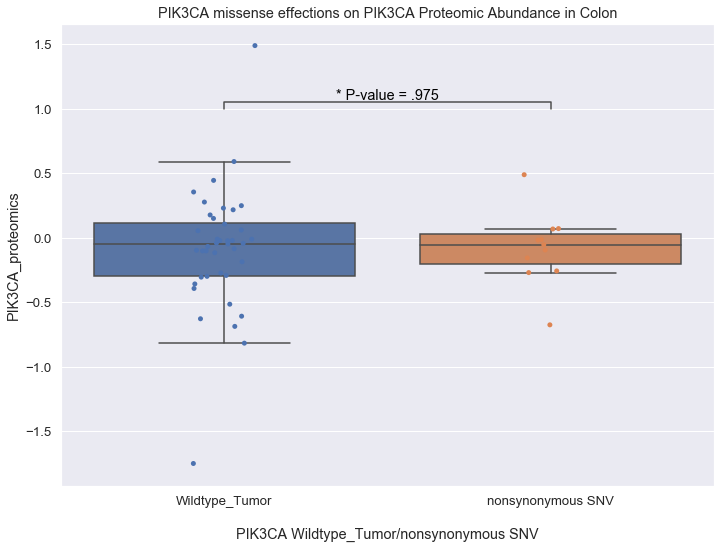

In [86]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='PIK3CA_Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'nonsynonymous SNV'],
                     data=joined,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Colon")
boxplot = sns.stripplot(x='PIK3CA_Mutation', y=gene+'_proteomics', data=joined, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/nonsynonymous SNV", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .975', 0, 1, 1)

plt.show()
plt.clf()
plt.close()

# Final Graph

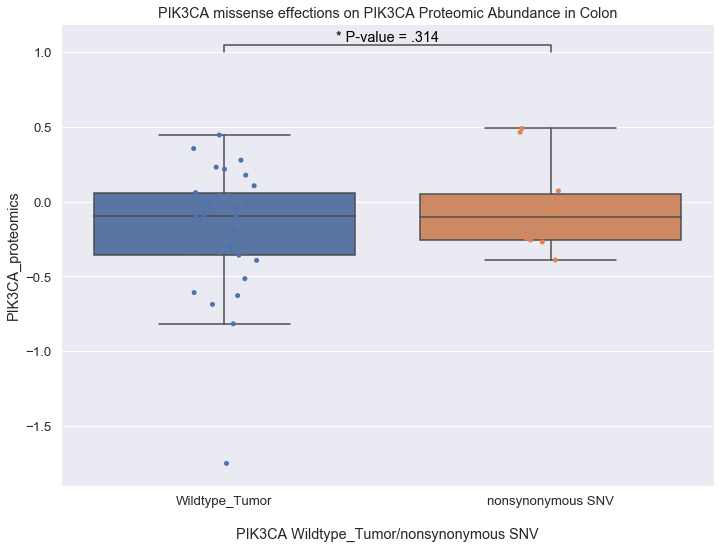

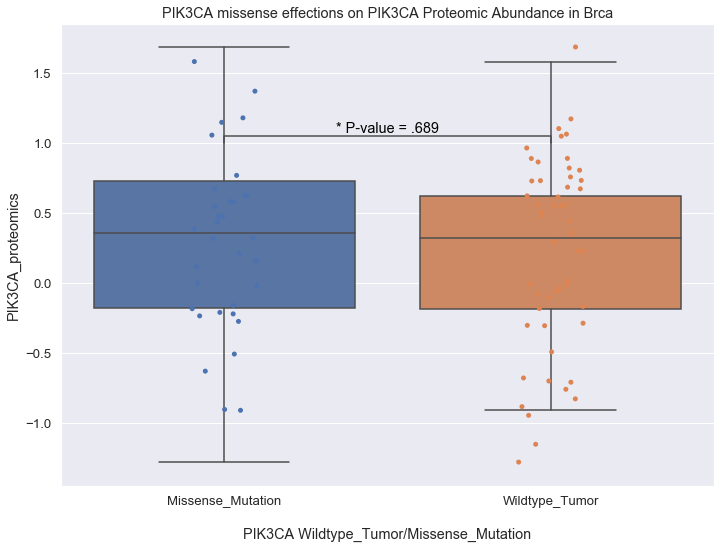

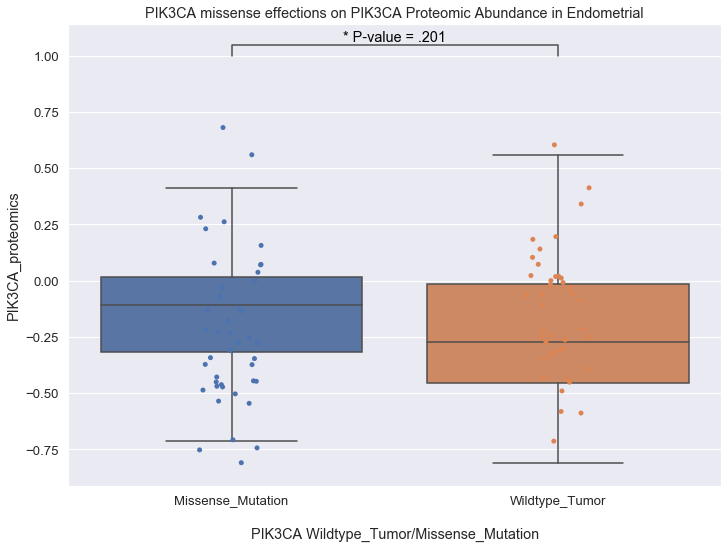

In [109]:
plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'nonsynonymous SNV'],
                     data=colon_missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Colon")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=colon_missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/nonsynonymous SNV", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .314', 0, 1, 1)

plt.show()
plt.clf()
plt.close()


plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=brca_missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Brca")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=brca_missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .689', 0, 1, 1)

plt.savefig('Brca_cis.png')
plt.show()
plt.clf()
plt.close()


plt.rcParams['figure.figsize']=(11.7,8.5) #size of plot
sns.set(font_scale = 1.2)

boxplot = sns.boxplot(x='Mutation', y=gene+'_proteomics',
                     order=['Wildtype_Tumor', 'Missense_Mutation'],
                     data=missense,
                     showfliers=False)

boxplot.set_title("PIK3CA missense effections on " + gene + " Proteomic Abundance in Endometrial")
boxplot = sns.stripplot(x='Mutation', y=gene+'_proteomics', data=missense, jitter=True)
boxplot.set(xlabel="\nPIK3CA Wildtype_Tumor/Missense_Mutation", ylabel=gene+"_proteomics")

format_pval_annotation('* P-value = .201', 0, 1, 1)

plt.savefig('Endo_cis.png')
plt.show()
plt.clf()
plt.close()